# Extra - Temperature Model

This extra is based on the [Swift for TensorFlow team's Celsius to Fahreinheit notebook](https://github.com/Ayush517/S4TF-Tutorials). It is updated for the latest.

It looks at training a model to convert Celsius temperatures to Fahrenheit temperatures. This is a contrived example, but illustrates the facets of building a model quite well.

## Imports

In [0]:
import TensorFlow
import Python

## Setting up

Then we need to hook Python into the notebook environment:

In [0]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

## Python Imports

And import the Python libraries that we'd like to use:

In [0]:
let plt = Python.import("matplotlib.pyplot")
let np = Python.import("numpy")  // Make numpy available using np.

## Creating training data

We need to create some celcius temperatures:


In [0]:
let celsiusTemps: [Float] = [-40, -10,  0,  8, 15, 22,  38]

And some fahrenheit temperatures:

In [0]:
let fahrenheitTemps: [Float] = [-40, 14, 32, 46, 59, 72, 100]

And define them as inputs and outputs, respectively:

In [0]:
let input = Tensor<Float>(shape: [7, 1], scalars: celsiusTemps)
let output = Tensor<Float>(shape: [7, 1], scalars: fahrenheitTemps)

## Displaying our data

We can also loop through our data, to show the relationship:

In [0]:
for (index, celsiusTemp) in celsiusTemps.enumerated() {
    print("\(celsiusTemp) degrees Celsius is equal to \(fahrenheitTemps[index]) degrees Fahrenheit")
}

## Creating the model

Our model is very simple! It's a single `Dense` layer, and our `callAsFunction()` just returns the input, passed through that layer.

In [0]:
struct CelsiusToFahrenheit: Layer {
    var layer = Dense<Float>(inputSize: 1, outputSize: 1)
  
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer(input)
    }
}

## Creating an instance of our model

In [0]:
var model = CelsiusToFahrenheit()

## Creating an optimizer

We'll create an optimizer, using Adam, for our model:

In [0]:
let optimizer = Adam(for: model, learningRate: 0.1)

## Defining some parameters

We want our context to be `.training`, and we need an epoch count, as well as somewhere to store our losses.

In [0]:
Context.local.learningPhase = .training

In [0]:
let epochCount = 500
var losses: [Float] = []

## Training the model

In [0]:
for epoch in 1...epochCount {
    var epochLoss: Float = 0
    let (loss, grad) = model.valueWithGradient { model -> Tensor<Float> in
        let pred = model(input)
        return meanSquaredError(predicted: pred, expected: output)
    }
    optimizer.update(&model.allDifferentiableVariables, along: grad)
    epochLoss = loss.scalarized()
    trainLossResults.append(epochLoss)
    if epoch.isMultiple(of: 20) {
        print("Epoch \(epoch): Loss: \(loss)")
    }
}

## Visualising with Python

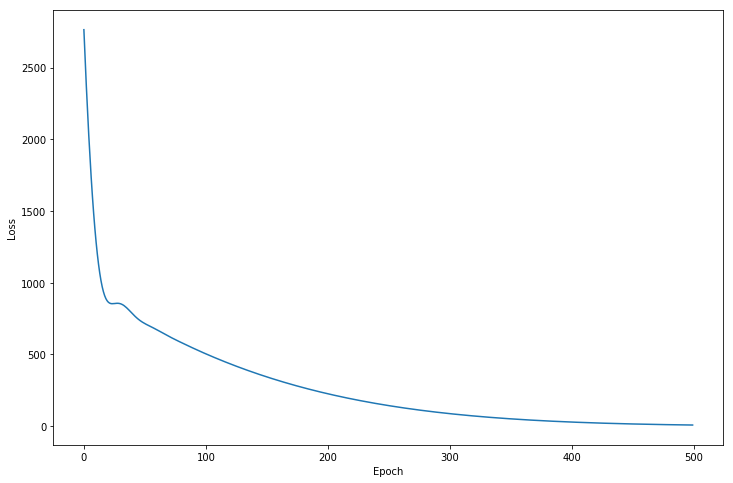

None


In [0]:
plt.figure(figsize: [12, 8])

plt.plot(trainLossResults)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## Predicting fahrenheit temperatures with the model

In [0]:
let exampleCelsiusData: [Float] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
let exampleCelciusDataPredictions = Tensor<Float>(shape: [10, 1], scalars: exampleCelsiusData)

let exampleCelciusDataPredictions = model(exampleCelciusDataPredictions)

print("Temperature predictions:")
print(exampleCelciusDataPredictions)

prediction:
[[47.307415],
 [ 65.53156],
 [ 83.75571],
 [101.97985],
 [  120.204],
 [138.42815],
 [ 156.6523],
 [174.87643],
 [193.10059],
 [211.32474]]


**The** correct answers are 

$10 \times 1.8 + 32 = 50$

$20 \times 1.8 + 32 = 68$

$30 \times 1.8 + 32 = 86$

$40 \times 1.8 + 32 = 104$

$50 \times 1.8 + 32 = 122$

$60 \times 1.8 + 32 = 140$

$70 \times 1.8 + 32 = 158$

$80 \times 1.8 + 32 = 176$

$90 \times 1.8 + 32 = 194$

$100 \times 1.8 + 32 = 212$

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [0]:
print(model.neuron.weight)
print(model.neuron.bias)

[[1.8224146]]
[29.08327]



The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. For a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same. 

## Extra Credit

* make more Dense layers in the model, with different input sizes, e.g. layer 1 (input 1, output 4), layer 2 (input 4, output 4), layer 3 (input 4, output 1), and sequence the input through them
  * does adding more layers to the model make it more accurate as compared to single layered model? (you can print out the `.weight` and `.biast` of each layer of the model and look)
  * is the model more accurate? Do the variables (the weights) in the new layers come anywhere near the way the equation works to convert F to C? Or have they just obscured it more?


